In [54]:
#import pandas to read the dataset
import pandas as pd
df = pd.read_csv('~/Downloads/yrbss_data.csv')  
print(df)

    gender  height
0   female    1.50
1     male    1.78
2     male    1.75
3     male    1.68
4     male    1.70
..     ...     ...
95    male    1.80
96  female    1.63
97    male    1.78
98    male    1.68
99    male    1.70

[100 rows x 2 columns]


In [120]:
#dividing the dataset into subgroups - male and female 
height_of_female = df['height'][df['gender']=='female']
height_of_male = df['height'][df['gender']=='male']
print(height_of_female.head(10))
print(height_of_male.head(10))

0     1.50
5     1.57
11    1.68
12    1.67
14    1.60
15    1.60
16    1.68
18    1.73
19    1.63
20    1.63
Name: height, dtype: float64
1     1.78
2     1.75
3     1.68
4     1.70
6     1.78
7     1.63
8     1.63
9     1.83
10    1.69
13    1.78
Name: height, dtype: float64


In [135]:
#print the summary statistics: mean,count,SD for height of female
height_of_female.describe()

count    51.000000
mean      1.648431
std       0.070011
min       1.500000
25%       1.600000
50%       1.650000
75%       1.700000
max       1.800000
Name: height, dtype: float64

In [136]:
#print the summary statistics: mean,count,SD for height of male
height_of_male.describe()

count    48.000000
mean      1.747917
std       0.076990
min       1.550000
25%       1.700000
50%       1.750000
75%       1.785000
max       1.930000
Name: height, dtype: float64

Text(0, 0.5, 'Frequency')

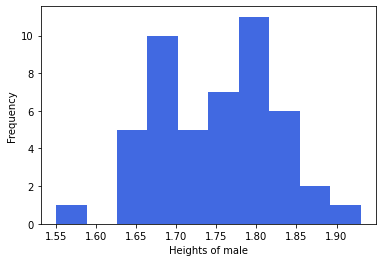

In [137]:
#plotting a histogram using the library metplotlib for males height
import matplotlib.pyplot as plt
plt.hist(height_of_male, color =  'royalblue')
plt.xlabel("Heights of male")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

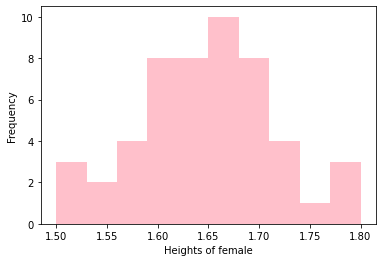

In [138]:
#plotting a histogram for females height
plt.hist(height_of_female, color = 'pink')
plt.xlabel("Heights of female")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

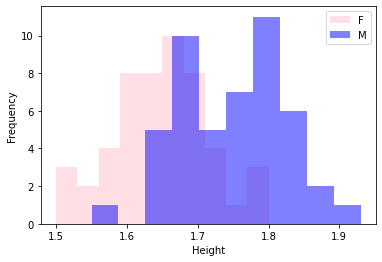

In [150]:
#plotting a histogram with both variables to show comparison
plt.hist(height_of_female, color = 'pink',alpha= 0.5)
plt.hist(height_of_male, color = 'blue', alpha = 0.5)
plt.legend("FM")
plt.xlabel("Height")
plt.ylabel("Frequency")


In [133]:
#import library 
import statistics 
print("statistics for female heights")
print("median=", statistics.median(height_of_female))
print("mode=",statistics.mode(height_of_female))
print("range=",(max(height_of_female)-min(height_of_female)))

statistics for female heights
median= 1.65
mode= 1.6
range= 0.30000000000000004


In [143]:
#using library to get relevant statistics 
print("statistics for male heights")
print("median=",statistics.median(height_of_male))
print("mode=",statistics.mode(height_of_male))
print("range=",(max(height_of_male)-min(height_of_male)))


statistics for male heights
median= 1.75
mode= 1.78
range= 0.3799999999999999


In [141]:
#this code has been used from class Session 13.2 https://sle-collaboration.minervaproject.com/
#?url=https%3A//sle-authoring.minervaproject.com/api/v1/worksheets/c942ce85-aaca-4b51-b9de-d14
#b96d31616/&userId=11969&name=Sana+Mehta&avatar=https%3A//s3.amazonaws.com/picasso.fixtures/
#Sana_Mehta_11969_2021-08-30T23%3A44%3A59.323Z&noPresence=1&readOnly=1&isInstructor=0&signatu
#re=25b3277b489db7d96e36710ca965f652f7c937e4e4d4b95327d6db62d9c5df7b

import numpy as np
from scipy import stats

#defining a function
def difference_of_means_test(data1,data2,tails):

#finding the count of data 
    n1 = len(data1)
    n2 = len(data2) 

#finding the mean of the two groups 
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    
#finding the standard deviation of the dataset
    s1 = np.std(data1,ddof=1) #bessels correction using n-1 as denominator
    s2 = np.std(data2,ddof=1)

#finding the standard error 
    SE = np.sqrt((s1**2/n1 + s2**2/n2))


#finding the t score using standard eror 
    Tscore = ((x2-x1)/SE)

#calculating degrees of freedom given the conservative estimate from openintro 
    df = min(n1,n2)-1
    
#calculating p value using stats library 
    pvalue = tails*stats.t.cdf(-Tscore,df)

#calculating pooled standard deviation using the formula 
    SDpooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2))

#calculating cohens d using the formula 
    Cohensd = (x2-x1)/SDpooled  

#calculating hedges g from cohens d
    hedgesg = Cohensd*((4*(n1+n2)-9)-(3))/(4*(n1+n2)-9)
    
#printing all the values calculated using the function     
    print('t=',Tscore)
    print('p =', pvalue)
    print('d =',Cohensd)
    print('g=',hedgesg)

#calling the function
difference_of_means_test(height_of_female,height_of_male,2)

t= 6.713450954353862
p = 2.22514300865667e-08
d = 1.3539963495503458
g= 1.3435002538173975


In [142]:
#importing relevant packages
#defining a function for calculating confidence interval
from scipy import stats
import numpy as np
def confidence_interval(mean,SD,n,level): 
    df = n-1 
    t = stats.t.ppf(1-(1-level)/2,df) #finding t score value where 1- (1-level)/2 shows 
    #sum of two tails and subtrating it from 1 because to give the correct side of the area on the graph 
    interval=((mean-t*SE,mean+t*SE))
    print("confidence_interval=",interval)

confidence_interval(1.64,0.7,51,0.95) #for heights of female 
confidence_interval(1.74,0.7,48,0.95) #for heights of male 

confidence_interval= (1.6203121827675093, 1.6596878172324905)
confidence_interval= (1.7202809988026393, 1.7597190011973607)
